# How can I check the correlation between features and target variable?
## https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def draw_corr(DF):
    corr = DF.corr().abs()
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
    plt.xticks(
        rotation=45,    
        horizontalalignment='right'
    )
    plt.show()

In [2]:
import pandas as pd
data = {'Loan ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008'],
        'Married': ['No', 'Yes', 'Yes', 'Yes', 'No'],
        'Dependents': [0, 1, 0, 0, 0],
        'Education': ['Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
        'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
        'Income': [5849, 4583, 3000, 2583, 6000],
        'Coapplicant Income': [0, 1508, 0, 2358, 0],
        'LoanAmount': [123, 128, 66, 120, 141],
        'Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Urban'],
        'Loan Status': ['Y', 'N', 'Y', 'Y', 'Y']} 
df = pd.DataFrame(data)
df

,Loan ID,Married,Dependents,Education,Self_Employed,Income,Coapplicant Income,LoanAmount,Area,Loan Status
0,LP001002,No,0,Graduate,No,5849,0,123,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,1508,128,Rural,N
2,LP001005,Yes,0,Graduate,Yes,3000,0,66,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,2583,2358,120,Urban,Y
4,LP001008,No,0,Graduate,No,6000,0,141,Urban,Y


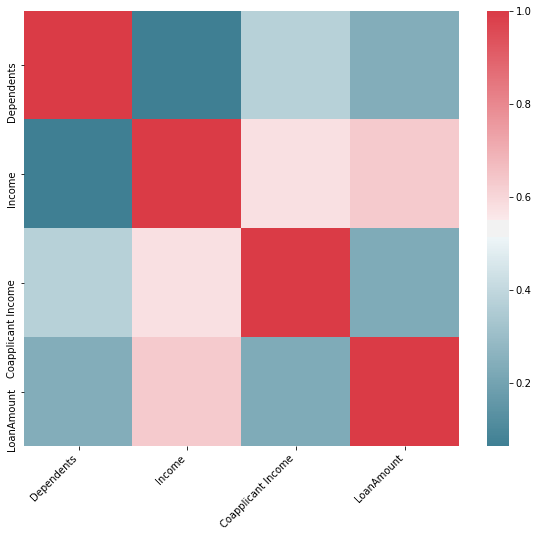

In [3]:
draw_corr(df)

In [4]:
# Converting the Categorical variables to numbers
for col in df.select_dtypes('object').columns.values:
    df[col] = df[col].astype('category').cat.codes

df

,Loan ID,Married,Dependents,Education,Self_Employed,Income,Coapplicant Income,LoanAmount,Area,Loan Status
0,0,0,0,0,0,5849,0,123,1,1
1,1,1,1,0,0,4583,1508,128,0,0
2,2,1,0,0,1,3000,0,66,1,1
3,3,1,0,1,0,2583,2358,120,1,1
4,4,0,0,0,0,6000,0,141,1,1


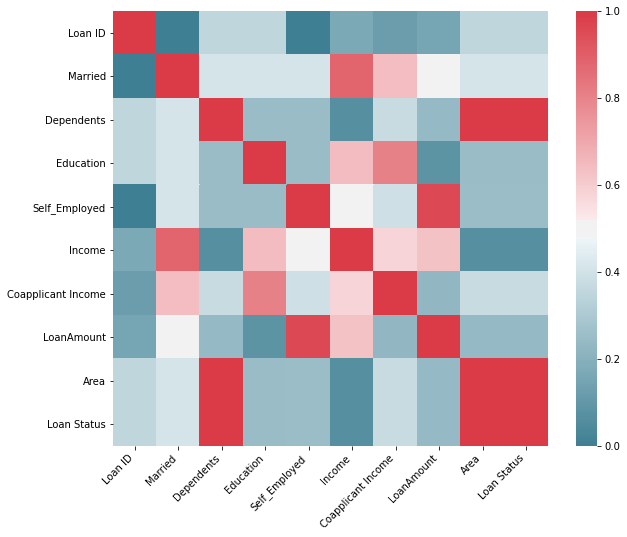

In [5]:
draw_corr(df)

In [6]:
df[['Area', 'Loan Status', 'Dependents']]

,Area,Loan Status,Dependents
0,1,1,0
1,0,0,1
2,1,1,0
3,1,1,0
4,1,1,0
